In [1]:
import pandas as pd
# file name 합치기
from glob import glob
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from sklearn.model_selection import train_test_split
# 시각화
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from skimage import io, feature
from skimage.transform import resize
import cv2
from PIL import ImageChops
import os
import gdown

In [2]:
img = Image.open("./images/image.png")

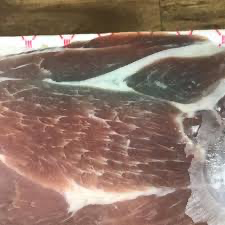

In [3]:
img

In [44]:
resized_img = img.resize((416, 416))

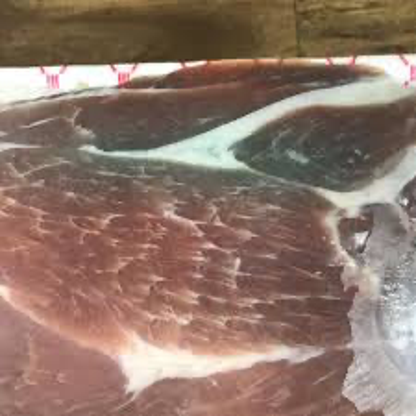

In [45]:
resized_img

In [46]:
box = (50,50,350,350)
cropped_img2 = resized_img.crop(box)

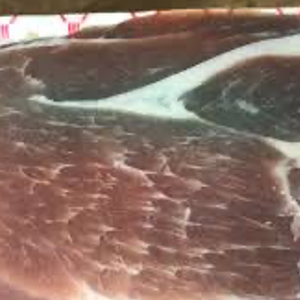

In [47]:
cropped_img2

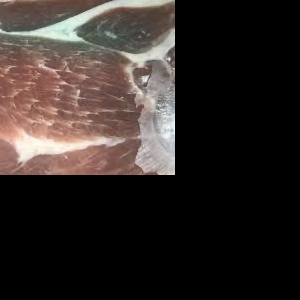

In [43]:
cropped_img2

In [24]:
resized_img = img.resize((300, 300))

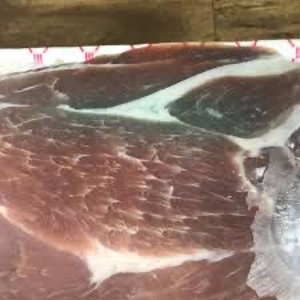

In [25]:
resized_img

In [35]:
box = (50,50,350,350)
cropped_img = resized_img.crop(box)

In [39]:
c = np.array(resized_img)

In [40]:
c.shape

(300, 300, 3)

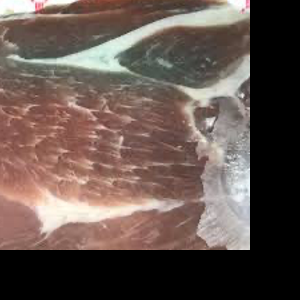

In [36]:
cropped_img

In [27]:
a = np.array(resized_img)

In [28]:
a.shape

(300, 300, 3)

In [16]:
b = cv2.resize(a, (300, 300))

In [31]:
b.shape

(300, 300, 3)

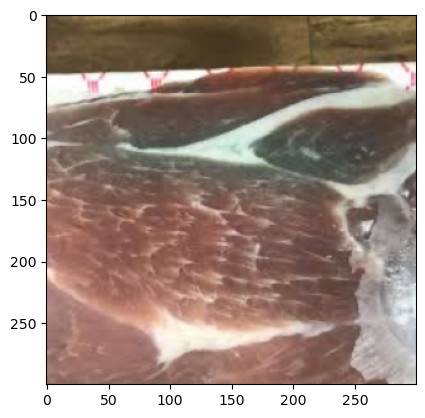

In [32]:
plt.imshow(b)

In [33]:
t_1 = b.reshape(1,300,300,3)

In [34]:
t_1

array([[[[ 94,  77,  51],
         [ 93,  76,  50],
         [ 93,  76,  50],
         ...,
         [127, 102,  61],
         [130, 105,  64],
         [136, 111,  70]],

        [[ 94,  77,  51],
         [ 93,  76,  50],
         [ 93,  76,  50],
         ...,
         [131, 106,  65],
         [132, 107,  66],
         [137, 112,  71]],

        [[ 94,  77,  51],
         [ 94,  76,  50],
         [ 93,  76,  50],
         ...,
         [134, 110,  68],
         [133, 109,  66],
         [132, 108,  66]],

        ...,

        [[142, 108,  97],
         [145, 111, 100],
         [151, 116, 105],
         ...,
         [208, 203, 200],
         [209, 206, 202],
         [211, 212, 206]],

        [[145, 109, 100],
         [144, 109,  99],
         [146, 111, 101],
         ...,
         [212, 207, 204],
         [211, 208, 204],
         [209, 209, 204]],

        [[154, 117, 109],
         [146, 109, 101],
         [142, 105,  97],
         ...,
         [217, 213, 210],
        

In [ ]:
box = (50,50,350,350)
cropped_img = b.crop(box)

---
## 고기 디텍팅 모델



In [37]:
img = glob("images/*.jpg")

In [43]:
img

['images/meat_2.jpg',
 'images/meat_3.jpg',
 'images/meat_1.jpg',
 'images/meat_4.jpg',
 'images/meat_5.jpg']

In [61]:
def multiful_image(filee,name):
    counter = 0
    data = Image.open(filee)
    for angle in range(0,60,2):
        data2 = data.rotate(angle)
        counter +=1
        data2.save(f"images/{name}_{str(counter)}.jpg")

In [66]:


multiful_image(img[4],"meat5")


In [35]:
count = "meat"
count + "a"


'meata'

In [67]:
imag = glob("JSON/*.jpg")

In [68]:
imag

['JSON/meat5_26.jpg',
 'JSON/meat2_13.jpg',
 'JSON/meat3_9.jpg',
 'JSON/meat3_8.jpg',
 'JSON/meat2_12.jpg',
 'JSON/meat5_27.jpg',
 'JSON/meat5_25.jpg',
 'JSON/meat2_10.jpg',
 'JSON/meat5_19.jpg',
 'JSON/meat1_8.jpg',
 'JSON/meat1_9.jpg',
 'JSON/meat2_11.jpg',
 'JSON/meat5_18.jpg',
 'JSON/meat5_30.jpg',
 'JSON/meat5_24.jpg',
 'JSON/meat5_9.jpg',
 'JSON/meat2_15.jpg',
 'JSON/meat5_20.jpg',
 'JSON/meat2_29.jpg',
 'JSON/meat5_21.jpg',
 'JSON/meat2_28.jpg',
 'JSON/meat2_14.jpg',
 'JSON/meat5_8.jpg',
 'JSON/meat2_16.jpg',
 'JSON/meat5_23.jpg',
 'JSON/meat5_22.jpg',
 'JSON/meat2_17.jpg',
 'JSON/meat1_21.jpg',
 'JSON/meat3_30.jpg',
 'JSON/meat3_24.jpg',
 'JSON/meat4_11.jpg',
 'JSON/meat3_18.jpg',
 'JSON/meat4_10.jpg',
 'JSON/meat3_19.jpg',
 'JSON/meat3_25.jpg',
 'JSON/meat1_20.jpg',
 'JSON/meat1_22.jpg',
 'JSON/meat2_9.jpg',
 'JSON/meat3_27.jpg',
 'JSON/meat4_12.jpg',
 'JSON/meat4_13.jpg',
 'JSON/meat3_26.jpg',
 'JSON/meat2_8.jpg',
 'JSON/meat1_23.jpg',
 'JSON/meat1_27.jpg',
 'JSON/meat4_17.jp

In [69]:
def rename_images(files, prefix):
    counter = 1
    for file_path in files:
        # 파일 확장자 추출
        file_ext = os.path.splitext(file_path)[1].lower()
        
        # 새로운 파일명 생성
        new_name = f"{prefix}_{counter}{file_ext}"
        
        # 디렉토리와 파일명을 분리하여 전체 경로 생성
        dir_path = os.path.dirname(file_path)
        new_path = os.path.join(dir_path, new_name)
        
        # 파일 이름 변경
        os.rename(file_path, new_path)
        print(f'Renamed: {file_path} -> {new_path}')
        
        # 카운터 증가
        counter += 1


In [71]:
# 파일 이름 변경
rename_images(imag, 'meat')

Renamed: JSON/meat5_26.jpg -> JSON/meat_1.jpg
Renamed: JSON/meat2_13.jpg -> JSON/meat_2.jpg
Renamed: JSON/meat3_9.jpg -> JSON/meat_3.jpg
Renamed: JSON/meat3_8.jpg -> JSON/meat_4.jpg
Renamed: JSON/meat2_12.jpg -> JSON/meat_5.jpg
Renamed: JSON/meat5_27.jpg -> JSON/meat_6.jpg
Renamed: JSON/meat5_25.jpg -> JSON/meat_7.jpg
Renamed: JSON/meat2_10.jpg -> JSON/meat_8.jpg
Renamed: JSON/meat5_19.jpg -> JSON/meat_9.jpg
Renamed: JSON/meat1_8.jpg -> JSON/meat_10.jpg
Renamed: JSON/meat1_9.jpg -> JSON/meat_11.jpg
Renamed: JSON/meat2_11.jpg -> JSON/meat_12.jpg
Renamed: JSON/meat5_18.jpg -> JSON/meat_13.jpg
Renamed: JSON/meat5_30.jpg -> JSON/meat_14.jpg
Renamed: JSON/meat5_24.jpg -> JSON/meat_15.jpg
Renamed: JSON/meat5_9.jpg -> JSON/meat_16.jpg
Renamed: JSON/meat2_15.jpg -> JSON/meat_17.jpg
Renamed: JSON/meat5_20.jpg -> JSON/meat_18.jpg
Renamed: JSON/meat2_29.jpg -> JSON/meat_19.jpg
Renamed: JSON/meat5_21.jpg -> JSON/meat_20.jpg
Renamed: JSON/meat2_28.jpg -> JSON/meat_21.jpg
Renamed: JSON/meat2_14.jpg 

In [73]:
imag

['JSON/meat5_26.jpg',
 'JSON/meat2_13.jpg',
 'JSON/meat3_9.jpg',
 'JSON/meat3_8.jpg',
 'JSON/meat2_12.jpg',
 'JSON/meat5_27.jpg',
 'JSON/meat5_25.jpg',
 'JSON/meat2_10.jpg',
 'JSON/meat5_19.jpg',
 'JSON/meat1_8.jpg',
 'JSON/meat1_9.jpg',
 'JSON/meat2_11.jpg',
 'JSON/meat5_18.jpg',
 'JSON/meat5_30.jpg',
 'JSON/meat5_24.jpg',
 'JSON/meat5_9.jpg',
 'JSON/meat2_15.jpg',
 'JSON/meat5_20.jpg',
 'JSON/meat2_29.jpg',
 'JSON/meat5_21.jpg',
 'JSON/meat2_28.jpg',
 'JSON/meat2_14.jpg',
 'JSON/meat5_8.jpg',
 'JSON/meat2_16.jpg',
 'JSON/meat5_23.jpg',
 'JSON/meat5_22.jpg',
 'JSON/meat2_17.jpg',
 'JSON/meat1_21.jpg',
 'JSON/meat3_30.jpg',
 'JSON/meat3_24.jpg',
 'JSON/meat4_11.jpg',
 'JSON/meat3_18.jpg',
 'JSON/meat4_10.jpg',
 'JSON/meat3_19.jpg',
 'JSON/meat3_25.jpg',
 'JSON/meat1_20.jpg',
 'JSON/meat1_22.jpg',
 'JSON/meat2_9.jpg',
 'JSON/meat3_27.jpg',
 'JSON/meat4_12.jpg',
 'JSON/meat4_13.jpg',
 'JSON/meat3_26.jpg',
 'JSON/meat2_8.jpg',
 'JSON/meat1_23.jpg',
 'JSON/meat1_27.jpg',
 'JSON/meat4_17.jp

In [83]:
im = glob("testimage/*.jpg")

In [84]:
im

['testimage/meat_2.jpg', 'testimage/meat_3.jpg', 'testimage/meat_1.jpg']

In [76]:
multiful_image(im[0],"meat")

In [87]:

counter = 0
data = Image.open(im[1])
for angle in range(0,180,20):
    data2 = data.rotate(angle)
    counter += 1
    data2.save(f"testimage/meat1_{str(counter)}.jpg")

---
# 채크

In [41]:
img = Image.open("./getimages/1.jpg")

In [42]:
box = (50,50,350,350)
name = ['신선','평범','상함']

In [43]:
img.size

(1300, 866)

In [44]:
cropped_img = img.crop(box)
    # a = a / 255.0

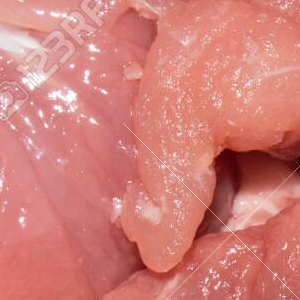

In [45]:
cropped_img

In [46]:
a = np.array(cropped_img)
a = a / 255.0

In [40]:
# a = np.array(img)
# a = a / 255.0

In [47]:
print(a.size)
print(a.shape)

270000
(300, 300, 3)


In [32]:
a

In [48]:
a = a.reshape(1,300,300,3)

In [49]:
model = keras.models.load_model("./Model(CNN)/best-cnn-model2.keras")

In [50]:
result = model.predict(a)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


In [51]:
result

array([[1.7147914e-02, 9.8285204e-01, 8.0325180e-17]], dtype=float32)

In [52]:
print(name[np.argmax(result)])

평범


In [12]:


url = 'https://drive.google.com/file/d/14oCRjf9DiVENHNRoUuC5dM23er5ujJx6/view?usp=sharing'
output = 'best-cnn-model3.keras'
down = gdown.download(url, output, quiet=False)
print(down)

Downloading...
From: https://drive.google.com/file/d/14oCRjf9DiVENHNRoUuC5dM23er5ujJx6/view?usp=sharing
To: /Users/beomshiekkang/project_Meat/PickMeat/python/Server/best-cnn-model3.keras
86.0kB [00:16, 5.36kB/s]

best-cnn-model3.keras


In [13]:
model = keras.models.load_model("best-cnn-model3.keras")

ValueError: File not found: filepath=best-cnn-model3.keras. Please ensure the file is an accessible `.keras` zip file.

In [14]:
!ls

Model(CNN)            best-cnn-model3.keras meatDetectingModel
PYserver.py           getimages             openjson.py
__pycache__           imagedetect.py        test.ipynb


In [22]:
q = Image.open("./getimages/1.jpg")

In [ ]:
#x: 58.55, y: 148.34, w: 431.26, h: 431.2

In [23]:
box = [58,148,431,431]

In [24]:
cropped_img = q.crop((box))

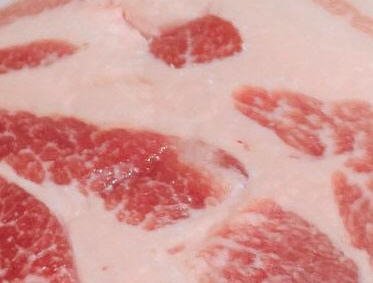

In [25]:
cropped_img

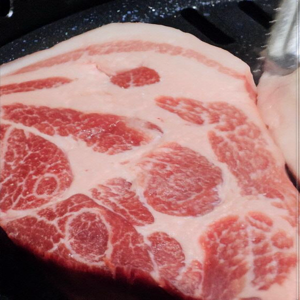

In [14]:
q

In [17]:
w, h = cropped_img.size

In [20]:
transparent_img = Image.new('RGBA', (w, h), (0, 0, 0, 0))

# 자른 이미지를 투명 배경 이미지에 붙여넣기
transparent_img.paste(cropped_img, (0, 0))

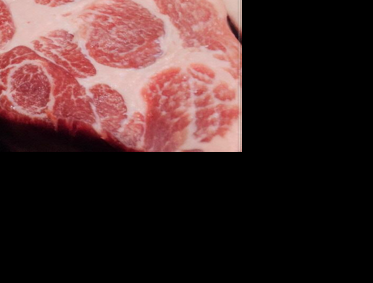

In [21]:
transparent_img

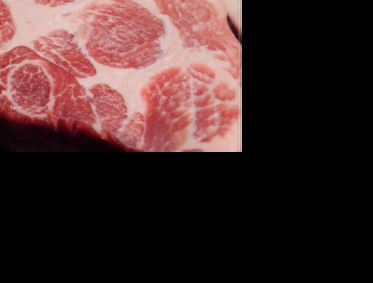

In [19]:
cropped_img.resize((w,h))

In [4]:
q.size

(563, 733)

In [8]:
q = q.resize((300,300))

In [10]:
q.size

(300, 300)

In [ ]:
cropped_img = data.crop((box))
a = np.array(cropped_img)
a = a / 255.0
a = a.resize((300,300))
a = a.reshape(1,300,300,3)

In [27]:
cropped_img.size

(373, 283)

In [36]:
a = cropped_img.resize((300,300))

In [39]:
a = np.array(a)

In [41]:
a.shape

(300, 300, 3)

In [43]:
a = a.reshape(1,300,300,3)

In [46]:
a = a / 255.0

In [47]:
a

array([[[[0.00490196, 0.00512821, 0.005     ],
         [0.00490196, 0.00512821, 0.005     ],
         [0.00492611, 0.00512821, 0.00505051],
         ...,
         [0.0045045 , 0.00497512, 0.00510204],
         [0.0045045 , 0.00497512, 0.00510204],
         [0.00452489, 0.005     , 0.00512821]],

        [[0.00487805, 0.00510204, 0.00497512],
         [0.00485437, 0.00507614, 0.00497512],
         [0.00485437, 0.00510204, 0.00502513],
         ...,
         [0.00452489, 0.005     , 0.00512821],
         [0.0045045 , 0.00497512, 0.00510204],
         [0.00452489, 0.005     , 0.00512821]],

        [[0.00490196, 0.00510204, 0.00502513],
         [0.00487805, 0.00512821, 0.005     ],
         [0.00483092, 0.00512821, 0.005     ],
         ...,
         [0.00454545, 0.00502513, 0.00515464],
         [0.00452489, 0.005     , 0.00512821],
         [0.0045045 , 0.00497512, 0.00510204]],

        ...,

        [[0.00571429, 0.01754386, 0.01694915],
         [0.00518135, 0.01333333, 0.01298701]

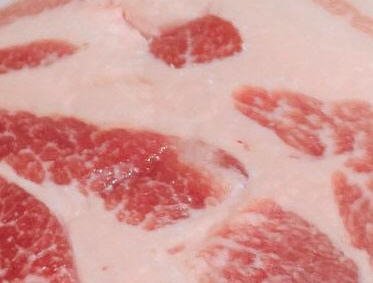

In [38]:
cropped_img

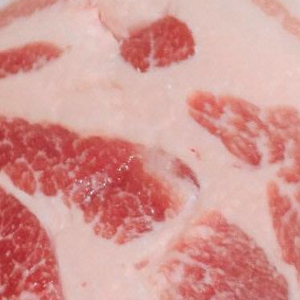

In [37]:
a

In [28]:
a = np.array(cropped_img)

In [30]:
a.shape

(283, 373, 3)

In [34]:
a = a.resize((300,300))

ValueError: cannot resize an array that references or is referenced
by another array in this way.
Use the np.resize function or refcheck=False

In [35]:
a = a.reshape(1,300,300,3)

ValueError: cannot reshape array of size 316677 into shape (1,300,300,3)

In [32]:
a

array([[[204, 195, 200],
        [204, 195, 200],
        [204, 196, 199],
        ...,
        [222, 201, 196],
        [222, 201, 196],
        [221, 200, 195]],

       [[205, 196, 201],
        [206, 197, 202],
        [205, 197, 200],
        ...,
        [221, 200, 195],
        [222, 201, 196],
        [221, 200, 195]],

       [[204, 196, 199],
        [204, 195, 200],
        [207, 196, 200],
        ...,
        [221, 200, 195],
        [221, 200, 195],
        [222, 201, 196]],

       ...,

       [[174,  56,  58],
        [185,  67,  69],
        [203,  88,  89],
        ...,
        [225, 192, 187],
        [220, 189, 183],
        [215, 186, 179]],

       [[176,  58,  62],
        [186,  69,  73],
        [207,  96,  99],
        ...,
        [227, 194, 189],
        [223, 192, 186],
        [219, 190, 183]],

       [[179,  60,  66],
        [182,  69,  75],
        [198,  97, 101],
        ...,
        [222, 189, 184],
        [219, 188, 182],
        [216, 187, 180]]

In [51]:
model = keras.models.load_model("./Model/best-cnn-model3.keras")
model2 = keras.models.load_model("./mod/best-cnn-model3.keras")

In [ ]:
model2

In [52]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 300, 300, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 150, 150, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 360000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │    36,000,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,059,387 (412.21 MB)

 Trainable params: 36,019,795 (137.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 72,039,592 (274.81 MB)

In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 104, 104, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 52, 52, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     4,326,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,038,587 (49.74 MB)

 Trainable params: 4,346,195 (16.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,692,392 (33.16 MB)